In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    
    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])
    
    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

In [3]:
db = pd.read_csv('housing.csv')
db.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
X = db[['housing_median_age']].values
Y = db['median_house_value'].values

In [5]:
X_Query = np.array([41]); # Predicting for this input
tau = 0.1 #bandwidth parameter
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for a house with 30 years old: {y_query}")

Predicted median house value for a house with 30 years old: 197253.77364864878


Predicted median house value for housing median age 10: 193923.8278903064
Predicted median house value for housing median age 20: 198521.40640040563
Predicted median house value for housing median age 30: 205106.16873237252
Predicted median house value for housing median age 40: 214431.02664171855
Predicted median house value for housing median age 50: 242024.36162521283


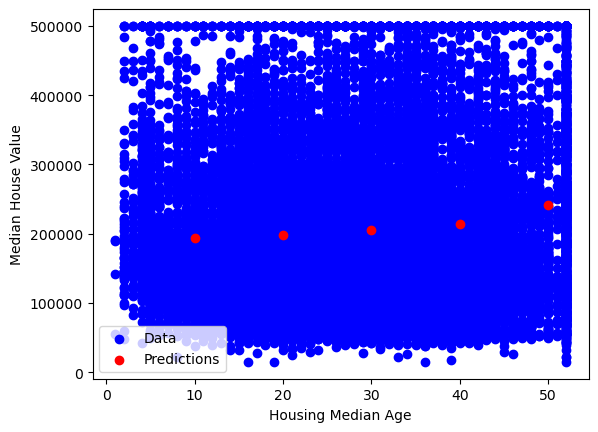

In [6]:
# Predict for multiple x_query values
x_queries = np.array([10, 20, 30, 40, 50])  # Replace with your desired query points
predictions = []

for x_query in x_queries:
    x_query = np.array([x_query])  # Ensure x_query is a 1D array
    y_query = locally_weighted_regression(X, Y, tau=10, x_query=x_query)
    predictions.append(y_query)
    print(f"Predicted median house value for housing median age {x_query[0]}: {y_query}")

# Optionally, visualize the predictions
plt.scatter(X, Y, color='blue', label='Data')
plt.scatter(x_queries, predictions, color='red', label='Predictions')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend() 
plt.show()

Activity

Predicted median house value for query [ 41 880]: 452600.0
LWR Mean Squared Error on Diabetes Dataset: 2618.01487879261
KNN Mean Squared Error on Diabetes Dataset: 3019.075505617978
Comparison of MSE: LWR = 2618.01487879261, KNN = 3019.075505617978


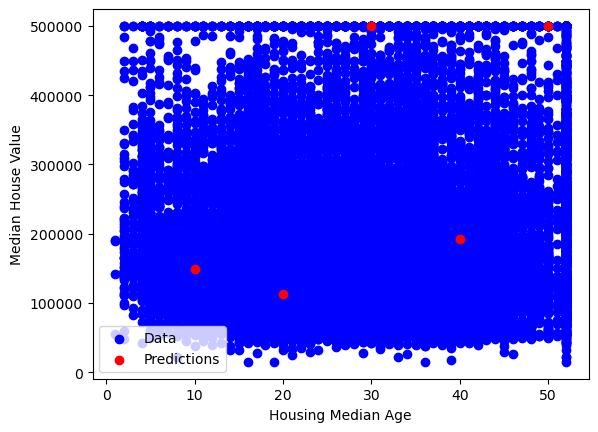

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Locally Weighted Regression for multiple features
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    
    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.r_[1, x_query]
    
    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

# 1. Housing Dataset with Multiple Features
db = pd.read_csv('housing.csv')
X = db[['housing_median_age', 'total_rooms']].values  # Consider two features
Y = db['median_house_value'].values

# Predict for a query point
X_Query = np.array([41, 880])  # Example query point
tau = 0.1  # Bandwidth parameter
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for query {X_Query}: {y_query}")

# 2. Diabetes Dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
Y_diabetes = diabetes.target

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, Y_diabetes, test_size=0.2, random_state=42)

# Predict using LWR
tau = 0.1
predictions_lwr = []
for x_query in X_test:
    y_query = locally_weighted_regression(X_train, Y_train, tau, x_query)
    predictions_lwr.append(y_query)

# Evaluate LWR
mse_lwr = mean_squared_error(Y_test, predictions_lwr)
print(f"LWR Mean Squared Error on Diabetes Dataset: {mse_lwr}")

# 3. KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
predictions_knn = knn.predict(X_test)

# Evaluate KNN
mse_knn = mean_squared_error(Y_test, predictions_knn)
print(f"KNN Mean Squared Error on Diabetes Dataset: {mse_knn}")

# Compare Results
print(f"Comparison of MSE: LWR = {mse_lwr}, KNN = {mse_knn}")

# Visualization for Housing Dataset
x_queries = np.array([[10, 500], [20, 1000], [30, 1500], [40, 2000], [50, 2500]])
predictions = []
for x_query in x_queries:
    y_query = locally_weighted_regression(X, Y, tau, x_query)
    predictions.append(y_query)

plt.scatter(X[:, 0], Y, color='blue', label='Data')  # Plot using the first feature
plt.scatter(x_queries[:, 0], predictions, color='red', label='Predictions')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()